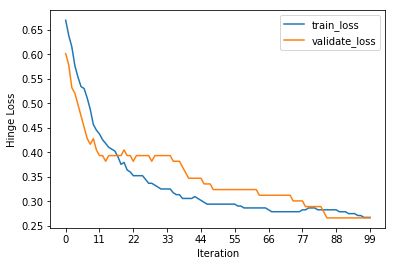

In [95]:
# write your code here
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np

# 读取数据集
mem=Memory('./mycache2')
@mem.cache
def get_data():
    data=load_svmlight_file('../data/australian_scale')
    return data[0],data[1]

# 求导函数
def grad(x, y, weight, C):
    tmp = np.zeros( weight.shape[0] )
    for i in range(0, x.shape[0]):
        if y[i] * np.dot( x[i] , weight ) < 1:
            tmp += -1 * y[i] * x[i]
    return weight + C * tmp

# 划分数据集
x,y=get_data()
y=y.reshape(690)
x=x.toarray()
x=np.c_[ x, np.ones(x.shape[0]) ]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,shuffle=False)

# 参数初始化过程
w=np.random.rand(15)    # 初始化权重
yita = 0.0001
C = 1
ranges=range(0, 100)
loss=[]
loss_validate=[]
# 以下是梯度下降过程
for e in ranges:
    w -= yita * grad( x_train, y_train, w, C)
    # 算训练集loss值
    label=[]
    for i in range(0, x_train.shape[0]):
        if np.dot( x_train[i] , w ) > 0:
            label.append(1.)
        else:
            label.append(-1.)
    cur=0.
    for i in range(0, x_train.shape[0]):
        cur += max(0., 1.-y_train[i]*label[i])
    loss.append(cur/len(y_train))
    # 算验证集loss值
    label_validate=[]
    for i in range(0, x_test.shape[0]):
        if np.dot( x_test[i] , w ) > 0:
            label_validate.append(1.)
        else:
            label_validate.append(-1.)
    cur=0.
    for i in range(0, x_test.shape[0]):
        cur += max(0, 1.-y_test[i]*label_validate[i])
    loss_validate.append(cur/len(y_test))
    
# 可视化实验结果
import matplotlib.pyplot as plt
figure1,=plt.plot(ranges,loss)
figure2,=plt.plot(ranges,loss_validate)
plt.xlabel('Iteration')
plt.ylabel('Hinge Loss')
plt.xticks(np.linspace(0, 99, 10))
plt.legend(handles=[figure1,figure2], labels=['train_loss','validate_loss'], loc='best')
plt.show()

In [66]:
x[0].shape

(15,)